In [1]:
import pandas as pd
import pickle 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("../output/FINAL/dataset.pca.60.csv")

In [3]:
with open("../output/FINAL/mm.60.pickle", "rb") as f:
    minmaxscaler = pickle.load(f) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
dfscaled = pd.DataFrame(minmaxscaler.transform(df.drop(columns=['cancer_type','dataset','uuid']))).join(df[['cancer_type','dataset','uuid']])

In [5]:
xtrain = dfscaled.query('dataset=="Train"').drop(columns=['cancer_type','dataset','uuid'])
ytrain = dfscaled.query('dataset=="Train"')['cancer_type']

xvalidation = dfscaled.query('dataset=="Validation"').drop(columns=['cancer_type','dataset','uuid'])
yvalidation = dfscaled.query('dataset=="Validation"')['cancer_type']

xtest = dfscaled.query('dataset=="Validation"').drop(columns=['cancer_type','dataset','uuid'])
ytest = dfscaled.query('dataset=="Validation"')['cancer_type']

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
scores = []

for max_depth in [10,20,30,40]:
    for n_estimators in [50,100,150,200,250,300,350,400,450,500]:
        rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
        rf.fit(xtrain, ytrain)
        train_score = rf.score(xtrain, ytrain)
        validation_score = rf.score(xvalidation, yvalidation)
        scores.append({
            'max_depth':max_depth,
            'n_estimators':n_estimators,
            'Dataset':'Train',
            'Accuracy':train_score
        })
        scores.append({
            'max_depth':max_depth,
            'n_estimators':n_estimators,
            'Dataset':'Validation',
            'Accuracy':validation_score
        })

In [9]:
scores = pd.DataFrame.from_records(scores)

<Axes: xlabel='n_estimators', ylabel='Accuracy'>

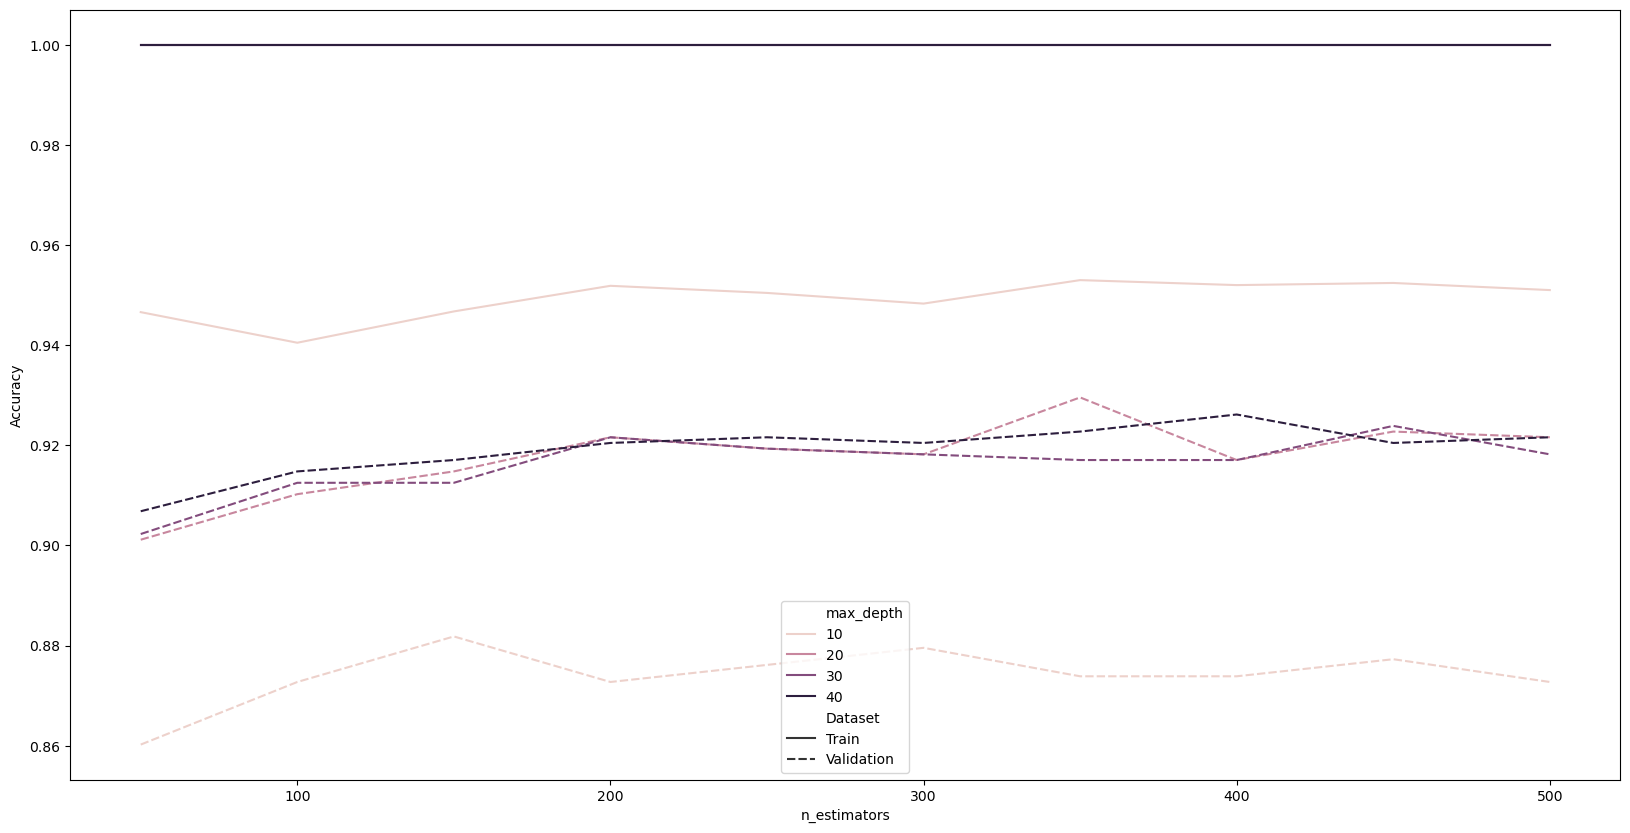

In [10]:
plt.figure(figsize=[20,10])
sns.lineplot(
    scores,
    x='n_estimators',
    y='Accuracy',
    hue='max_depth',
    style='Dataset'
)

In [11]:
scores.query('Dataset=="Validation"').sort_values(by='Accuracy', ascending=False)

,max_depth,n_estimators,Dataset,Accuracy
33,20,350,Validation,0.929545
75,40,400,Validation,0.926136
57,30,450,Validation,0.923864
73,40,350,Validation,0.922727
37,20,450,Validation,0.922727
79,40,500,Validation,0.921591
69,40,250,Validation,0.921591
47,30,200,Validation,0.921591
39,20,500,Validation,0.921591
27,20,200,Validation,0.921591


In [12]:
best_random_forest = RandomForestClassifier(n_estimators=200, max_depth=40)
best_random_forest.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [13]:
def plot_confusion_matrix(model):
    preds = model.predict(xtest)
    cmatrix = confusion_matrix(
            ytest,
            preds
        )
    ConfusionMatrixDisplay(
        cmatrix,
        display_labels=model.classes_
    ).plot()
    plt.xticks(rotation=90)
    plt.show()
    return pd.DataFrame(cmatrix, index=model.classes_, columns=model.classes_)

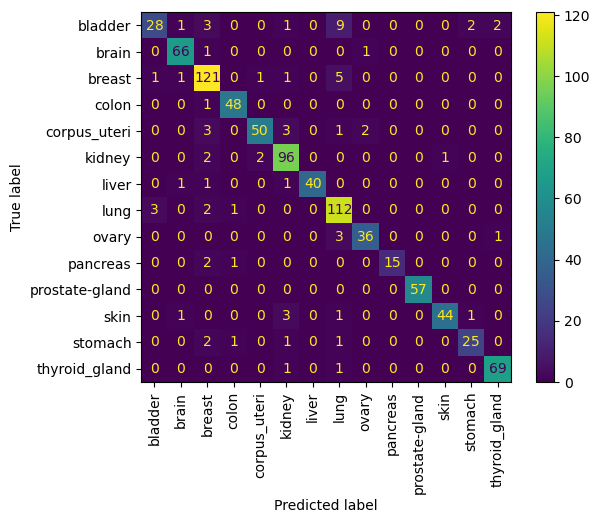

,bladder,brain,breast,colon,corpus_uteri,kidney,liver,lung,ovary,pancreas,prostate-gland,skin,stomach,thyroid_gland
bladder,28,1,3,0,0,1,0,9,0,0,0,0,2,2
brain,0,66,1,0,0,0,0,0,1,0,0,0,0,0
breast,1,1,121,0,1,1,0,5,0,0,0,0,0,0
colon,0,0,1,48,0,0,0,0,0,0,0,0,0,0
corpus_uteri,0,0,3,0,50,3,0,1,2,0,0,0,0,0
kidney,0,0,2,0,2,96,0,0,0,0,0,1,0,0
liver,0,1,1,0,0,1,40,0,0,0,0,0,0,0
lung,3,0,2,1,0,0,0,112,0,0,0,0,0,0
ovary,0,0,0,0,0,0,0,3,36,0,0,0,0,1
pancreas,0,0,2,1,0,0,0,0,0,15,0,0,0,0


In [14]:
plot_confusion_matrix(best_random_forest)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
scores_logreg = []

for c in [0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10]:
    lr = LogisticRegression(max_iter=10000, C=c)
    lr.fit(xtrain,ytrain)
    train_score = lr.score(xtrain, ytrain)
    validation_score = lr.score(xvalidation, yvalidation)
    scores_logreg.append({
        'C':c,
        'Accuracy':train_score,
        'Dataset':'Train'
    })
    scores_logreg.append({
        'C':c,
        'Accuracy':validation_score,
        'Dataset':'Validation'
    })

In [17]:
scores_logreg_df = pd.DataFrame.from_records(scores_logreg)

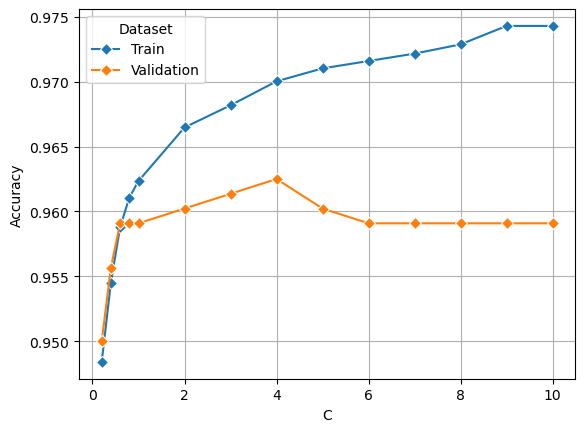

In [18]:
sns.lineplot(
    scores_logreg_df,
    x='C',
    y='Accuracy',
    hue='Dataset',
    marker="D"
)
plt.grid()
None

In [19]:
scores_logreg_df.query

<bound method DataFrame.query of        C  Accuracy     Dataset
0    0.2  0.948423       Train
1    0.2  0.950000  Validation
2    0.4  0.954533       Train
3    0.4  0.955682  Validation
4    0.6  0.958795       Train
5    0.6  0.959091  Validation
6    0.8  0.961068       Train
7    0.8  0.959091  Validation
8    1.0  0.962347       Train
9    1.0  0.959091  Validation
10   2.0  0.966468       Train
11   2.0  0.960227  Validation
12   3.0  0.968173       Train
13   3.0  0.961364  Validation
14   4.0  0.970020       Train
15   4.0  0.962500  Validation
16   5.0  0.971014       Train
17   5.0  0.960227  Validation
18   6.0  0.971583       Train
19   6.0  0.959091  Validation
20   7.0  0.972151       Train
21   7.0  0.959091  Validation
22   8.0  0.972862       Train
23   8.0  0.959091  Validation
24   9.0  0.974282       Train
25   9.0  0.959091  Validation
26  10.0  0.974282       Train
27  10.0  0.959091  Validation>

In [20]:
best_logreg = LogisticRegression(C=2, max_iter=10000)
best_logreg.fit(xtrain, ytrain)

LogisticRegression(C=2, max_iter=10000)

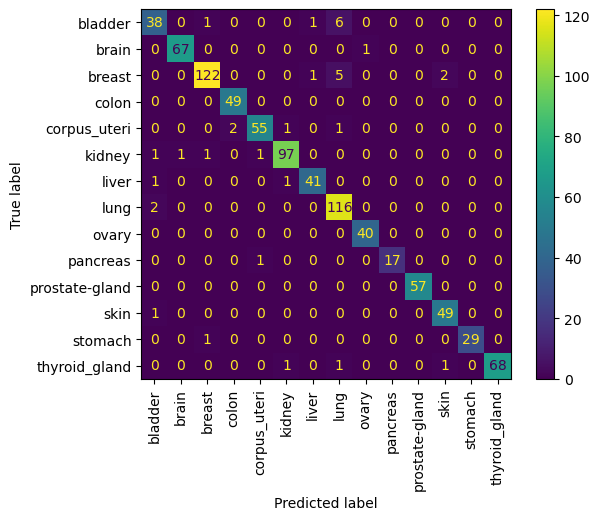

,bladder,brain,breast,colon,corpus_uteri,kidney,liver,lung,ovary,pancreas,prostate-gland,skin,stomach,thyroid_gland
bladder,38,0,1,0,0,0,1,6,0,0,0,0,0,0
brain,0,67,0,0,0,0,0,0,1,0,0,0,0,0
breast,0,0,122,0,0,0,1,5,0,0,0,2,0,0
colon,0,0,0,49,0,0,0,0,0,0,0,0,0,0
corpus_uteri,0,0,0,2,55,1,0,1,0,0,0,0,0,0
kidney,1,1,1,0,1,97,0,0,0,0,0,0,0,0
liver,1,0,0,0,0,1,41,0,0,0,0,0,0,0
lung,2,0,0,0,0,0,0,116,0,0,0,0,0,0
ovary,0,0,0,0,0,0,0,0,40,0,0,0,0,0
pancreas,0,0,0,0,1,0,0,0,0,17,0,0,0,0


In [21]:
plot_confusion_matrix(best_logreg)

In [22]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [23]:
scores_svc = []
for kernel in ['linear','rbf']:
    for c in [0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10]:
        svc = SVC(kernel=kernel,C=c)
        svc.fit(xtrain, ytrain)
        train_score = svc.score(xtrain, ytrain)
        validation_score = svc.score(xvalidation, yvalidation)
        scores_svc.append({
            'C':c,
            'kernel':kernel,
            'Accuracy':train_score,
            'Dataset':'Train'
        })
        scores_svc.append({
            'C':c,
            'kernel':kernel,
            'Accuracy':validation_score,
            'Dataset':'Validation'
        })

In [24]:
scores_svc_df = pd.DataFrame.from_records(scores_svc)

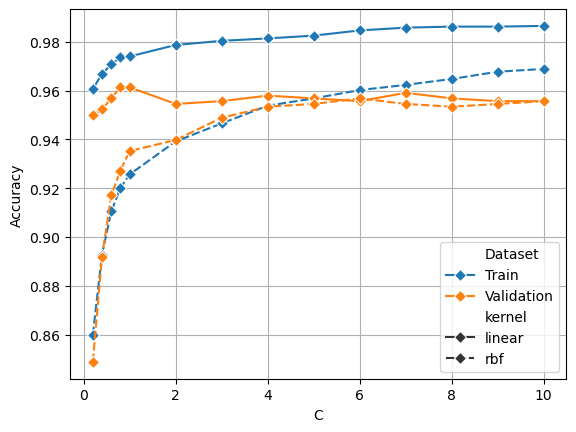

In [25]:
sns.lineplot(
    scores_svc_df,
    x='C',
    y='Accuracy',
    hue='Dataset',
    style='kernel',
    marker="D"
)
plt.grid()
None

In [26]:
scores_svc_df

,C,kernel,Accuracy,Dataset
0,0.2,linear,0.960642,Train
1,0.2,linear,0.950000,Validation
2,0.4,linear,0.966894,Train
3,0.4,linear,0.952273,Validation
4,0.6,linear,0.970730,Train
5,0.6,linear,0.956818,Validation
6,0.8,linear,0.973572,Train
7,0.8,linear,0.961364,Validation
8,1.0,linear,0.973998,Train
9,1.0,linear,0.961364,Validation


In [27]:
best_svc = SVC(kernel='linear', C=0.8)
best_svc.fit(xtrain, ytrain)

SVC(C=0.8, kernel='linear')

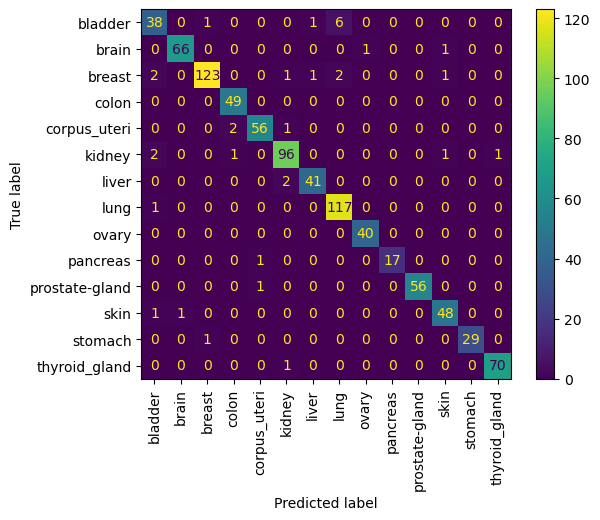

,bladder,brain,breast,colon,corpus_uteri,kidney,liver,lung,ovary,pancreas,prostate-gland,skin,stomach,thyroid_gland
bladder,38,0,1,0,0,0,1,6,0,0,0,0,0,0
brain,0,66,0,0,0,0,0,0,1,0,0,1,0,0
breast,2,0,123,0,0,1,1,2,0,0,0,1,0,0
colon,0,0,0,49,0,0,0,0,0,0,0,0,0,0
corpus_uteri,0,0,0,2,56,1,0,0,0,0,0,0,0,0
kidney,2,0,0,1,0,96,0,0,0,0,0,1,0,1
liver,0,0,0,0,0,2,41,0,0,0,0,0,0,0
lung,1,0,0,0,0,0,0,117,0,0,0,0,0,0
ovary,0,0,0,0,0,0,0,0,40,0,0,0,0,0
pancreas,0,0,0,0,1,0,0,0,0,17,0,0,0,0


In [28]:
plot_confusion_matrix(best_svc)